In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#Upload CSV file and store it
df = pd.read_csv("2021-2022 Football Player Stats.csv", encoding = "ISO-8859-1", sep=';')

In [3]:
df.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,1,Max Aarons,ENG,DF,Norwich City,Premier League,22.0,2000,34,32,...,0.03,1.41,1.16,0.0,0.06,0.03,5.53,0.47,1.59,22.7
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,34.0,1987,34,34,...,0.00,0.06,1.39,0.0,0.03,0.00,6.77,2.02,1.36,59.8
2,3,Salis Abdul Samed,GHA,MF,Clermont Foot,Ligue 1,22.0,2000,31,29,...,0.00,0.36,1.24,0.0,0.00,0.00,8.76,0.88,0.88,50.0
3,4,Laurent Abergel,FRA,MF,Lorient,Ligue 1,29.0,1993,34,34,...,0.03,0.79,2.23,0.0,0.00,0.00,8.87,0.43,0.43,50.0
4,5,Charles Abi,FRA,FW,Saint-Étienne,Ligue 1,22.0,2000,1,1,...,0.00,2.00,0.00,0.0,0.00,0.00,4.00,2.00,0.00,100.0


In [4]:
#Check if there are duplicates
df.duplicated().sum()

0

In [5]:
#Remove the columns that I don't need. Just focus on the metrics for goals and shooting
df = df.drop(["PasTotCmp", "PasTotAtt", "PasTotCmp%", "PasTotDist", "PasTotPrgDist",
    "PasShoCmp", "PasShoAtt", "PasShoCmp%", "PasMedCmp", "PasMedAtt",
    "PasMedCmp%", "PasLonCmp", "PasLonAtt", "PasLonCmp%", "Assists",
    "PasAss", "Pas3rd", "PPA", "CrsPA", "PasProg",
    "PasAtt", "PasLive", "PasDead", "PasFK", "TB",
    "PasPress", "Sw", "PasCrs", "CK", "CkIn",
    "CkOut", "CkStr", "PasGround", "PasLow", "PasHigh",
    "PaswLeft", "PaswRight", "PaswHead", "TI", "PaswOther",
    "PasCmp", "PasOff", "PasOut", "PasInt", "PasBlocks",
    "SCA", "ScaPassLive", "ScaPassDead", "ScaDrib", "ScaSh",
    "ScaFld", "ScaDef", "GCA", "GcaPassLive", "GcaPassDead",
    "GcaDrib", "GcaSh", "GcaFld", "GcaDef", "Tkl",
    "TklWon", "TklDef3rd", "TklMid3rd", "TklAtt3rd", "TklDri",
    "TklDriAtt", "TklDri%", "TklDriPast", "Press", "PresSucc",
    "Press%", "PresDef3rd", "PresMid3rd", "PresAtt3rd", "Blocks",
    "BlkSh", "BlkShSv", "BlkPass", "Int", "Tkl+Int",
    "Clr", "Err", "Touches", "TouDefPen", "TouDef3rd",
    "TouMid3rd", "TouAtt3rd", "TouAttPen", "TouLive", "DriSucc",
    "DriAtt", "DriSucc%", "DriPast", "DriMegs", "Carries",
    "CarTotDist", "CarPrgDist", "CarProg", "Car3rd", "CPA",
    "CarMis", "CarDis", "RecTarg", "Rec", "Rec%",
    "RecProg", "CrdY", "CrdR", "2CrdY", "Fls",
    "Fld", "Off", "Crs", "TklW", "PKwon",
    "PKcon", "OG", "Recov", "AerWon", "AerLost", "AerWon%"], axis=1)

In [6]:
df.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Goals,Shots,SoT,SoT%,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt
0,1,Max Aarons,ENG,DF,Norwich City,Premier League,22.0,2000,34,32,...,0.00,0.41,0.06,15.4,0.00,0.00,20.5,0.0,0.0,0.0
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,34.0,1987,34,34,...,0.06,0.54,0.18,33.3,0.11,0.33,18.7,0.0,0.0,0.0
2,3,Salis Abdul Samed,GHA,MF,Clermont Foot,Ligue 1,22.0,2000,31,29,...,0.04,0.66,0.18,27.8,0.06,0.20,20.3,0.0,0.0,0.0
3,4,Laurent Abergel,FRA,MF,Lorient,Ligue 1,29.0,1993,34,34,...,0.00,0.91,0.21,23.3,0.00,0.00,22.6,0.0,0.0,0.0
4,5,Charles Abi,FRA,FW,Saint-Étienne,Ligue 1,22.0,2000,1,1,...,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0


In [7]:
# Change column names
df = df.rename(columns= {'Rk': 'Rank', 'Nation': 'Nationality', 'Pos': 'Position', 'Squad': 'Club', 'Comp': 'League'})

In [8]:
# Remove all the zeros
df[['Goals', 'Shots', 'SoT', 'SoT%', 'G/Sh', 'G/SoT', 'ShoDist']] = df[['Goals', 'Shots', 'SoT', 'SoT%', 'G/Sh', 'G/SoT', 'ShoDist']].replace(0, np.nan)

In [9]:
df.head()

,Rank,Player,Nationality,Position,Club,League,Age,Born,MP,Starts,...,Goals,Shots,SoT,SoT%,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt
0,1,Max Aarons,ENG,DF,Norwich City,Premier League,22.0,2000,34,32,...,NaN,0.41,0.06,15.4,NaN,NaN,20.5,0.0,0.0,0.0
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,34.0,1987,34,34,...,0.06,0.54,0.18,33.3,0.11,0.33,18.7,0.0,0.0,0.0
2,3,Salis Abdul Samed,GHA,MF,Clermont Foot,Ligue 1,22.0,2000,31,29,...,0.04,0.66,0.18,27.8,0.06,0.20,20.3,0.0,0.0,0.0
3,4,Laurent Abergel,FRA,MF,Lorient,Ligue 1,29.0,1993,34,34,...,NaN,0.91,0.21,23.3,NaN,NaN,22.6,0.0,0.0,0.0
4,5,Charles Abi,FRA,FW,Saint-Étienne,Ligue 1,22.0,2000,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0


In [10]:
#Check for null values
df.isna().sum()

Rank              0
Player            0
Nationality       1
Position          0
Club              0
League            0
Age               1
Born              0
MP                0
Starts            0
Min               0
90s               0
Goals          1539
Shots           557
SoT             926
SoT%            926
G/Sh           1553
G/SoT          1553
ShoDist         557
ShoFK             0
ShoPK             0
PKatt             0
dtype: int64

In [11]:
# Remove rows
df = df.dropna()
df.head()

,Rank,Player,Nationality,Position,Club,League,Age,Born,MP,Starts,...,Goals,Shots,SoT,SoT%,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,34.0,1987,34,34,...,0.06,0.54,0.18,33.3,0.11,0.33,18.7,0.00,0.00,0.00
2,3,Salis Abdul Samed,GHA,MF,Clermont Foot,Ligue 1,22.0,2000,31,29,...,0.04,0.66,0.18,27.8,0.06,0.20,20.3,0.00,0.00,0.00
7,8,Tammy Abraham,ENG,FW,Roma,Serie A,24.0,1997,37,36,...,0.50,2.71,0.93,34.4,0.15,0.44,12.2,0.06,0.09,0.09
9,10,Francesco Acerbi,ITA,DF,Lazio,Serie A,34.0,1988,30,29,...,0.14,0.57,0.25,43.8,0.25,0.57,9.2,0.00,0.00,0.00
12,13,Marcos Acuña,ARG,DF,Sevilla,La Liga,30.0,1991,31,26,...,0.04,0.68,0.20,29.4,0.06,0.20,22.1,0.04,0.00,0.00


In [12]:
# Filter on players that have played at least 20 matches
df = df[(df['MP'] >= 20)]

In [13]:
df = df[(df['Goals'] >= 0.50)]
df

,Rank,Player,Nationality,Position,Club,League,Age,Born,MP,Starts,...,Goals,Shots,SoT,SoT%,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt
7,8,Tammy Abraham,ENG,FW,Roma,Serie A,24.0,1997,37,36,...,0.50,2.71,0.93,34.4,0.15,0.44,12.2,0.06,0.09,0.09
49,50,Lucas Alario,ARG,FW,Leverkusen,Bundesliga,29.0,1992,27,5,...,0.82,3.15,1.78,56.5,0.26,0.46,11.2,0.00,0.00,0.14
131,132,Marco Asensio,ESP,FWMF,Real Madrid,La Liga,26.0,1996,31,19,...,0.52,3.33,1.61,48.4,0.16,0.32,18.6,0.05,0.00,0.00
136,137,Iago Aspas,ESP,FW,Celta Vigo,La Liga,34.0,1987,37,36,...,0.50,2.45,1.08,44.0,0.17,0.38,15.9,0.20,0.09,0.15
148,149,Taiwo Awoniyi,NGA,FW,Union Berlin,Bundesliga,24.0,1997,31,29,...,0.62,2.73,1.24,45.5,0.20,0.43,12.9,0.00,0.08,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,2667,Raúl de Tomás,ESP,FW,Espanyol,La Liga,27.0,1994,34,33,...,0.52,3.12,1.23,39.6,0.12,0.30,18.2,0.28,0.15,0.15
2729,2730,Enes Ünal,TUR,FW,Getafe,La Liga,25.0,1997,37,33,...,0.51,2.64,0.77,29.3,0.17,0.58,15.8,0.23,0.06,0.13
2751,2752,Jamie Vardy,ENG,FW,Leicester City,Premier League,35.0,1987,25,20,...,0.75,2.64,1.24,47.2,0.28,0.60,12.1,0.00,0.00,0.00
2801,2802,Duan Vlahovi?,SRB,FW,Fiorentina,Serie A,22.0,2000,21,21,...,0.83,3.35,1.31,39.1,0.17,0.44,16.2,0.24,0.24,0.29


In [14]:
df = df.drop(['ShoFK', 'ShoPK', 'PKatt'], axis=1)
df.head()

,Rank,Player,Nationality,Position,Club,League,Age,Born,MP,Starts,Min,90s,Goals,Shots,SoT,SoT%,G/Sh,G/SoT,ShoDist
7,8,Tammy Abraham,ENG,FW,Roma,Serie A,24.0,1997,37,36,3084,34.3,0.50,2.71,0.93,34.4,0.15,0.44,12.2
49,50,Lucas Alario,ARG,FW,Leverkusen,Bundesliga,29.0,1992,27,5,655,7.3,0.82,3.15,1.78,56.5,0.26,0.46,11.2
131,132,Marco Asensio,ESP,FWMF,Real Madrid,La Liga,26.0,1996,31,19,1731,19.2,0.52,3.33,1.61,48.4,0.16,0.32,18.6
136,137,Iago Aspas,ESP,FW,Celta Vigo,La Liga,34.0,1987,37,36,3087,34.3,0.50,2.45,1.08,44.0,0.17,0.38,15.9
148,149,Taiwo Awoniyi,NGA,FW,Union Berlin,Bundesliga,24.0,1997,31,29,2174,24.2,0.62,2.73,1.24,45.5,0.20,0.43,12.9


In [17]:
# Fix misspellings of Player Names
df['Player'] = df['Player'].replace({'Duan Vlahovi?': 'Dušan Vlahović', 'Mario Paali?': 'Mario Pašalić', 'Zlatan Ibrahimovi?':'Zlatan Ibrahimović'})

In [18]:
# Sort df by Goals
df = df.sort_values(by=['Goals', 'Shots'], ascending=[False, True]).head(50)

In [19]:
# Reset the index
df = df.reset_index(drop=True)

In [20]:
df.head(50)

,Rank,Player,Nationality,Position,Club,League,Age,Born,MP,Starts,Min,90s,Goals,Shots,SoT,SoT%,G/Sh,G/SoT,ShoDist
0,1513,Robert Lewandowski,POL,FW,Bayern Munich,Bundesliga,33.0,1988,34,34,2946,32.7,1.07,4.80,2.35,49.0,0.19,0.39,12.6
1,1118,Erling Haaland,NOR,FW,Dortmund,Bundesliga,21.0,2000,24,21,1911,21.2,1.04,3.49,1.46,41.9,0.22,0.52,13.5
2,2426,Patrik Schick,CZE,FW,Leverkusen,Bundesliga,26.0,1996,27,26,2076,23.1,1.04,3.81,1.82,47.7,0.26,0.55,12.6
3,1713,Eric Maxim Choupo-Moting,CMR,FWMF,Bayern Munich,Bundesliga,33.0,1989,20,1,377,4.2,0.95,3.57,1.90,53.3,0.27,0.50,11.1
4,285,Karim Benzema,FRA,FW,Real Madrid,La Liga,34.0,1987,32,31,2593,28.8,0.94,4.10,1.63,39.8,0.17,0.43,15.5
5,1237,Ciro Immobile,ITA,FW,Lazio,Serie A,32.0,1990,31,31,2711,30.1,0.90,3.62,1.66,45.9,0.18,0.40,15.0
6,266,Wissam Ben Yedder,FRA,FW,Monaco,Ligue 1,31.0,1990,37,29,2529,28.1,0.89,2.31,1.25,53.8,0.26,0.49,14.0
7,669,Moussa Dembélé,FRA,FW,Lyon,Ligue 1,25.0,1996,30,25,2207,24.5,0.86,3.43,1.51,44.0,0.19,0.43,12.0
8,2802,Dušan Vlahović,SRB,FW,Fiorentina,Serie A,22.0,2000,21,21,1857,20.6,0.83,3.35,1.31,39.1,0.17,0.44,16.2
9,1721,Kylian Mbappé,FRA,FW,Paris S-G,Ligue 1,23.0,1998,35,34,3023,33.6,0.83,4.29,1.79,41.7,0.17,0.40,16.8


In [22]:
# Drop the 'Rank' column
df = df.drop('Rank', axis=1)

In [23]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

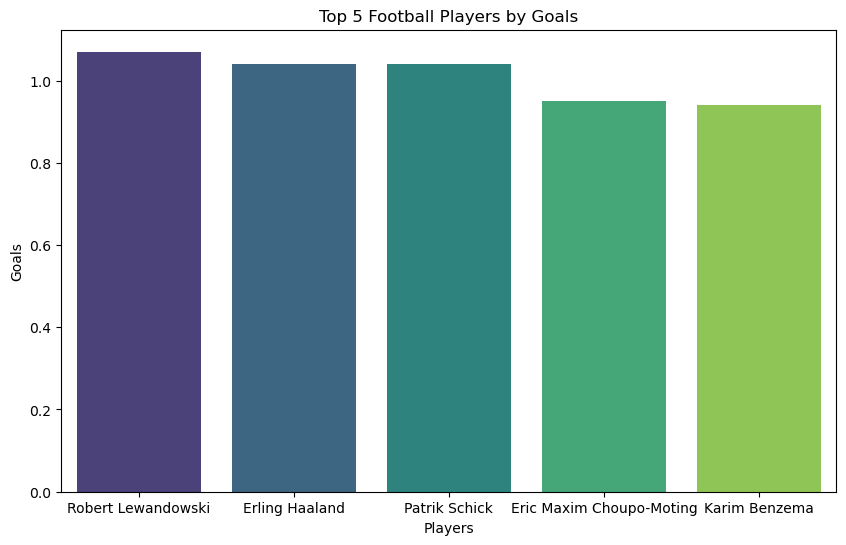

In [24]:
# Assuming df is your DataFrame containing all players and relevant data

# Sort the DataFrame by 'Goals' in descending order to get the top 5 players
top_players_df = df.sort_values(by='Goals', ascending=False).head(5)

# Initialize the matplotlib figure
plt.figure(figsize=(10, 6))

# Creating a bar plot for just 'Goals' of the top 5 players
sns.barplot(x='Player', y='Goals', data=top_players_df, palette='viridis')

# Adding labels and title
plt.xlabel('Players')
plt.ylabel('Goals')
plt.title('Top 5 Football Players by Goals')

# Show the plot
plt.show()

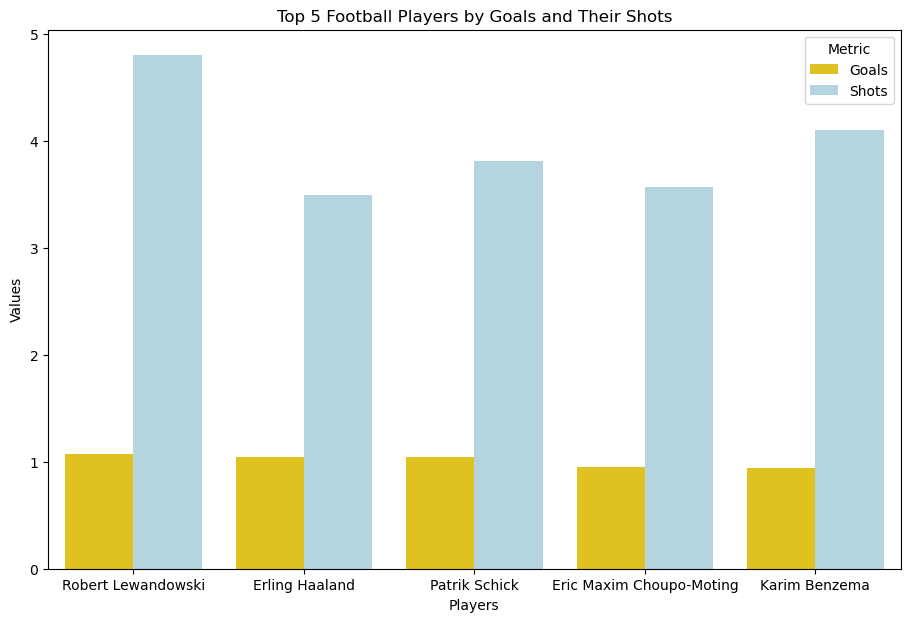

In [25]:
# Assuming df is your DataFrame containing all players and relevant data

# Sort and select top players based on goals
top_players_df = df.sort_values(by='Goals', ascending=False).head(5)

# Melting for sns.barplot compatibility
melted_df = pd.melt(top_players_df, id_vars=['Player'], value_vars=['Goals', 'Shots'],
                    var_name='Metric', value_name='Value')

# Define color palette to emphasize 'Goals'
palette = {"Goals": "gold", "Shots": "lightblue"}

# Initialize the matplotlib figure
plt.figure(figsize=(11, 7))

# Creating a bar plot
sns.barplot(x='Player', y='Value', hue='Metric', data=melted_df, palette=palette)

# Adding labels and title
plt.xlabel('Players')
plt.ylabel('Values')
plt.title('Top 5 Football Players by Goals and Their Shots')

# Show the plot
plt.show()

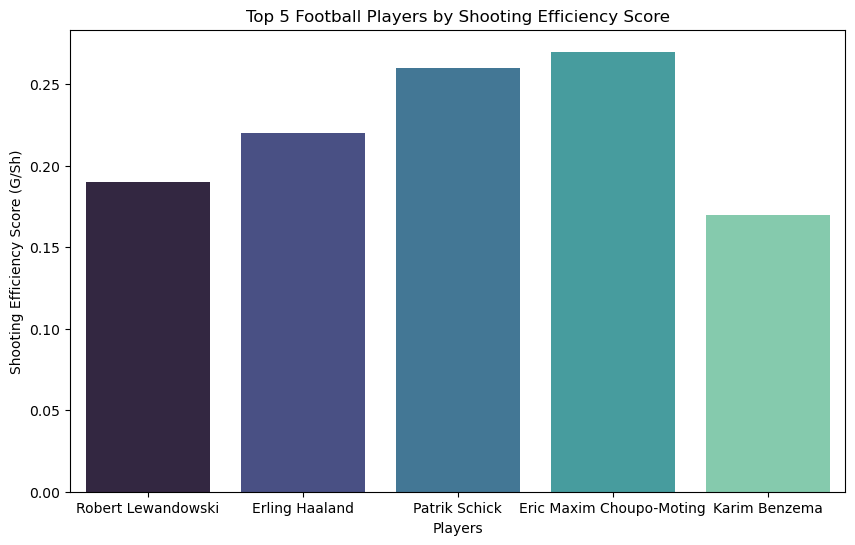

In [26]:
# Sort the DataFrame by 'Goals' in descending order and get the top 5 players.
# This is assuming you still want to focus on top players by goals but show their SES.
top_players_df = df.sort_values(by='Goals', ascending=False).head(5)

# Initialize the matplotlib figure
plt.figure(figsize=(10, 6))

# Creating a bar plot for 'G/Sh' of the top 5 players, considering it as SES for demonstration.
sns.barplot(x='Player', y='G/Sh', data=top_players_df, palette='mako')

# Adding labels and title
plt.xlabel('Players')
plt.ylabel('Shooting Efficiency Score (G/Sh)')
plt.title('Top 5 Football Players by Shooting Efficiency Score')

# Show the plot
plt.show()

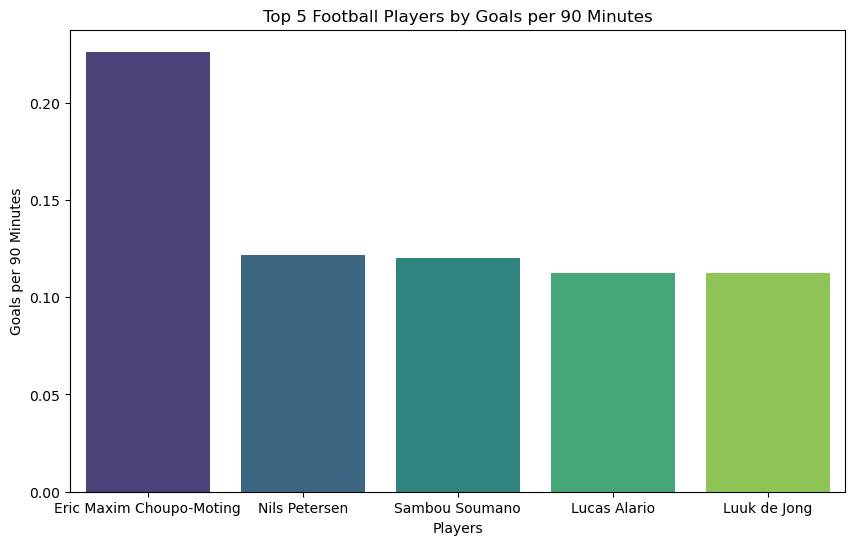

In [27]:

# Calculate 'Goals per 90' for each player
df['Goals per 90'] = df['Goals'] / df['90s']

# Sort and select top 5 players based on 'Goals per 90'
top_players_df = df.sort_values(by='Goals per 90', ascending=False).head(5)

# Initialize the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a bar plot for 'Goals per 90'
sns.barplot(x='Player', y='Goals per 90', data=top_players_df, palette='viridis')

# Adding labels and title
plt.xlabel('Players')
plt.ylabel('Goals per 90 Minutes')
plt.title('Top 5 Football Players by Goals per 90 Minutes')

# Show the plot
plt.show()

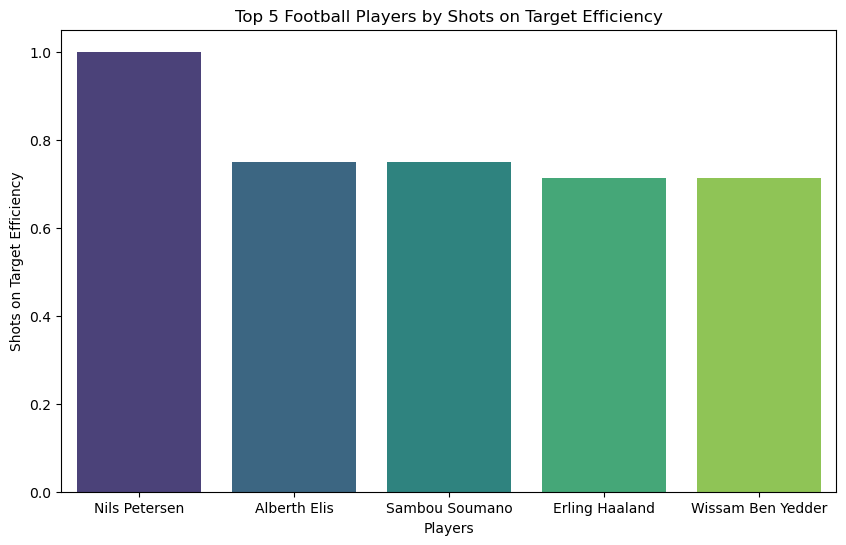

In [28]:
# Calculating Shots on Target Efficiency
df['SoT Efficiency'] = df['Goals'] / df['SoT']

# Sorting and selecting the top 5 players based on 'SoT Efficiency'
top_players_sot_df = df.sort_values(by='SoT Efficiency', ascending=False).head(5)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Player', y='SoT Efficiency', data=top_players_sot_df, palette='viridis')
plt.xlabel('Players')
plt.ylabel('Shots on Target Efficiency')
plt.title('Top 5 Football Players by Shots on Target Efficiency')
plt.show()

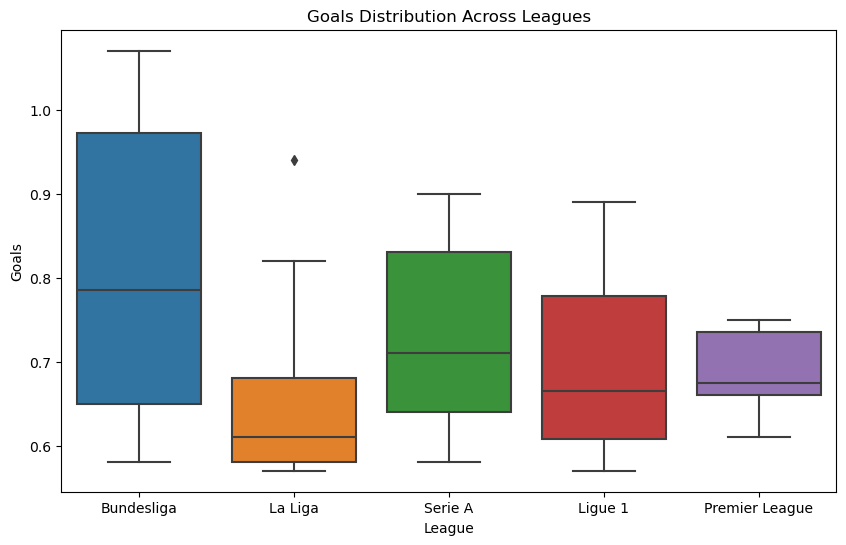

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='League', y='Goals', data=df)
plt.title('Goals Distribution Across Leagues')
plt.show()

In [30]:
# Calculate league and position norms/averages for Goals
league_averages = df.groupby('League')['Goals'].mean().rename('League_Goal_Avg')
position_averages = df.groupby('Position')['Goals'].mean().rename('Position_Goal_Avg')

# Merge these averages back into the original dataframe for comparison
df = df.merge(league_averages, on='League')
df = df.merge(position_averages, on='Position')

In [42]:
# Mapping of country acronyms to their full names
country_mapping = {
    'POL': 'Poland',
    'NOR': 'Norway',
    'CZE': 'Czech Republic',
    'ARG': 'Argentina',
    'FRA': 'France',
    'NGA': 'Nigeria',
    'NED': 'Netherlands',
    'ESP': 'Spain',
    'COL': 'Colombia',
    'BRA': 'Brazil',
    'ITA': 'Italy',
    'SRB': 'Serbia',
    'SWE': 'Sweden',
    'ALG': 'Algeria',
    'ENG': 'England',
    'EGY': 'Egypt',
    'POR': 'Portugal',
    'CMR': 'Cameroon',
    'DEN': 'Denmark',
    'GER': 'Germany',
    'AUT': 'Austria',
    'BEL': 'Belgium',
    'GUI': 'Guinea',
    'SEN': 'Senegal',
    'HON': 'Honduras',
    'KOR': 'South Korea',
    'CRO': 'Croatia',
}


In [43]:
# Replace the acronyms using country_mapping
df['Nationality'] = df['Nationality'].replace(country_mapping)

In [44]:
df

,Player,Nationality,Position,Club,League,Age,Born,MP,Starts,Min,...,SoT Efficiency,League_Goal_Avg,Position_Goal_Avg,Goal_League_Ratio,Goal_Position_Ratio,Norm Goals per 90,Norm SoT%,Norm G/Sh,Composite Score,Efficiency Rank
0,Robert Lewandowski,Poland,FW,Bayern Munich,Bundesliga,33.0,1988,34,34,2946,...,0.455319,0.801667,0.740882,1.334719,1.444224,0.065941,0.781341,0.333333,0.393538,23.0
1,Erling Haaland,Norway,FW,Dortmund,Bundesliga,21.0,2000,24,21,1911,...,0.712329,0.801667,0.740882,1.297297,1.403732,0.144805,0.574344,0.476190,0.398447,22.0
2,Patrik Schick,Czech Republic,FW,Leverkusen,Bundesliga,26.0,1996,27,26,2076,...,0.571429,0.801667,0.740882,1.297297,1.403732,0.125325,0.743440,0.666667,0.511811,9.0
3,Lucas Alario,Argentina,FW,Leverkusen,Bundesliga,29.0,1992,27,5,655,...,0.460674,0.801667,0.740882,1.022869,1.106788,0.450281,1.000000,0.666667,0.705649,2.0
4,Anthony Modeste,France,FW,Köln,Bundesliga,34.0,1988,32,31,2606,...,0.466216,0.801667,0.740882,0.860707,0.931322,0.022834,0.524781,0.285714,0.277777,40.0
5,Taiwo Awoniyi,Nigeria,FW,Union Berlin,Bundesliga,24.0,1997,31,29,2174,...,0.500000,0.801667,0.740882,0.773389,0.836840,0.031653,0.679300,0.380952,0.363969,26.0
6,Karim Benzema,France,FW,Real Madrid,La Liga,34.0,1987,32,31,2593,...,0.576687,0.666667,0.740882,1.410000,1.268757,0.065541,0.513120,0.238095,0.272252,42.0
7,Luuk de Jong,Netherlands,FW,Barcelona,La Liga,31.0,1990,21,6,654,...,0.666667,0.666667,0.740882,1.230000,1.106788,0.450281,0.361516,0.523810,0.445202,13.0
8,Juanmi,Spain,FW,Betis,La Liga,29.0,1993,33,26,2131,...,0.535433,0.666667,0.740882,1.020000,0.917825,0.046486,0.941691,0.809524,0.599233,5.0
9,Radamel Falcao,Colombia,FW,Rayo Vallecano,La Liga,36.0,1986,22,8,838,...,0.403727,0.666667,0.740882,0.975000,0.877332,0.245400,0.679300,0.285714,0.403471,21.0


In [32]:
# Calculate comparative metrics
df['Goal_League_Ratio'] = df['Goals'] / df['League_Goal_Avg']
df['Goal_Position_Ratio'] = df['Goals'] / df['Position_Goal_Avg']

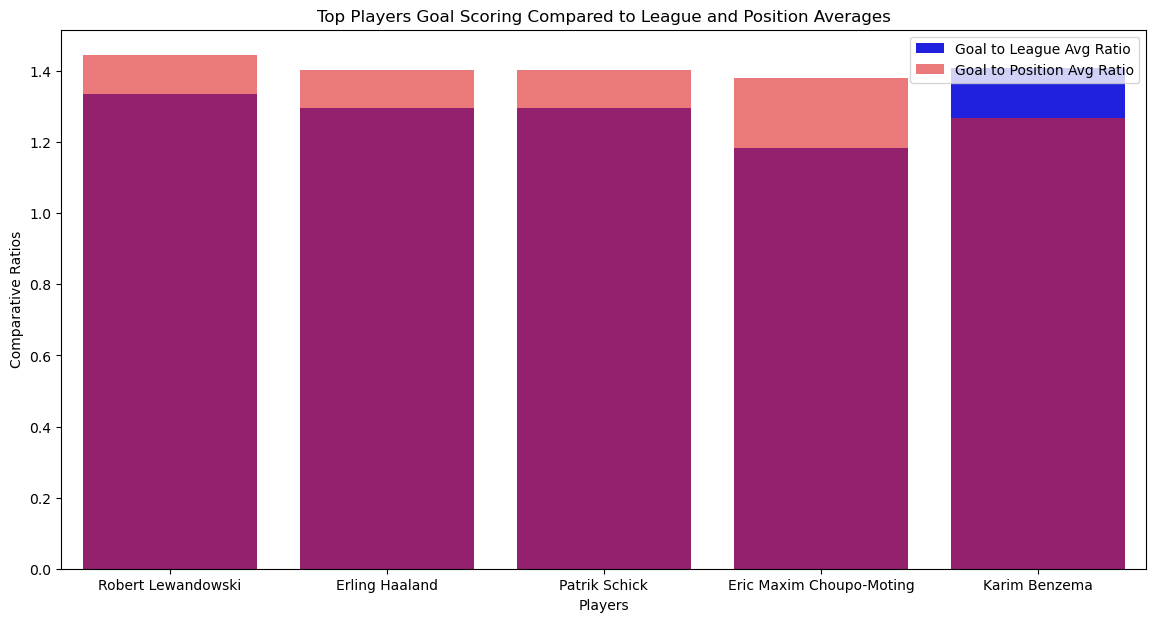

In [33]:
# Let's plot just the top 10 players for clarity
top_players_df = df.sort_values(by='Goals', ascending=False).head(5)

# Initialize the matplotlib figure
plt.figure(figsize=(14, 7))

# Bar plot for Goal League Ratio
sns.barplot(x='Player', y='Goal_League_Ratio', data=top_players_df, color='blue', label='Goal to League Avg Ratio')

# Bar plot for Goal Position Ratio
sns.barplot(x='Player', y='Goal_Position_Ratio', data=top_players_df, color='red', alpha=0.6, label='Goal to Position Avg Ratio')

# Adding labels and title
plt.xlabel('Players')
plt.ylabel('Comparative Ratios')
plt.title('Top Players Goal Scoring Compared to League and Position Averages')
plt.legend()

# Show the plot
plt.show()

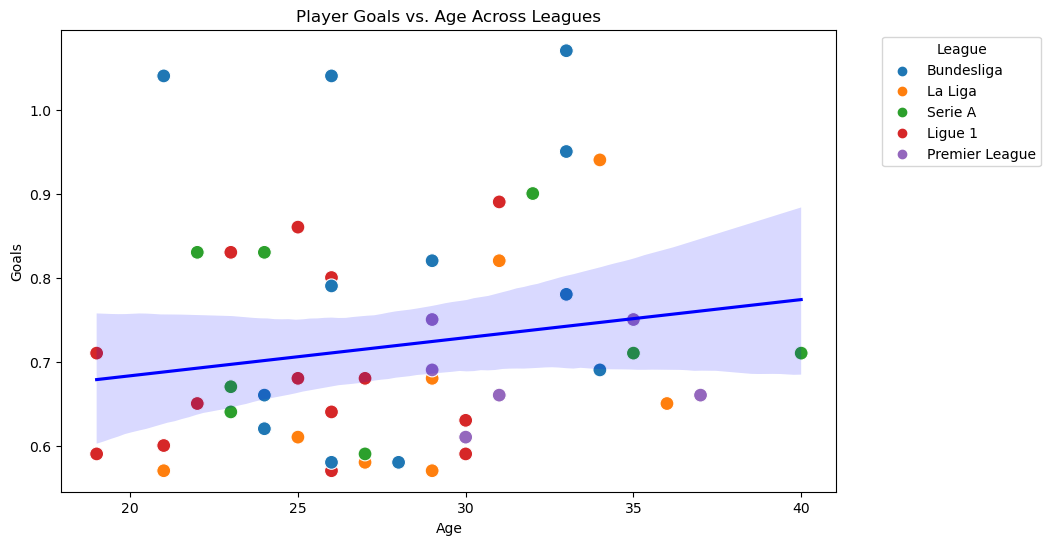

In [34]:
# Initialize the matplotlib figure
plt.figure(figsize=(10, 6))

# Creating a scatter plot for 'Goals' against 'Age'
sns.scatterplot(x='Age', y='Goals', data=df, hue='League', s=100)

# Adding a regression line to see the trend
sns.regplot(x='Age', y='Goals', data=df, scatter=False, color='blue')

# Enhancing the plot
plt.title('Player Goals vs. Age Across Leagues')
plt.xlabel('Age')
plt.ylabel('Goals')
plt.legend(title='League', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

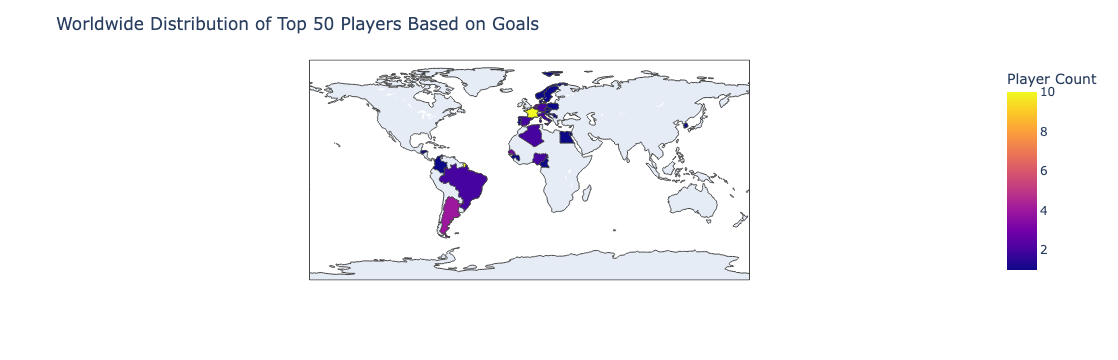

In [46]:
# Sort players by 'Goals' and get the top 50
top_50_players = df.sort_values(by='Goals', ascending=False).head(50)

# Calculate the number of players per country within the top 50
player_counts = top_50_players['Nationality'].value_counts().reset_index()
player_counts.columns = ['Country', 'Player Count']

# Create the choropleth map
fig = px.choropleth(player_counts,
                    locations="Country",
                    locationmode='country names',  # This should match the format of your 'Country' column
                    color="Player Count",
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.update_layout(title='Worldwide Distribution of Top 50 Players Based on Goals')
fig.show()

In [ ]:
# Sort players by 'Goals' and get the top 30
top_30_players_df = df.sort_values(by='Goals', ascending=False).head(30)

# Count the number of players in each league among the top 30
league_counts_top_30 = top_30_players_df['League'].value_counts()

# Now plotting
fig, ax = plt.subplots()
ax.pie(league_counts_top_30, labels=league_counts_top_30.index, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('League Distribution of Top 30 Players Based on Goals')
plt.show()

In [36]:
# Assuming df is your DataFrame

# Step 2: Normalize key metrics (assuming they are calculated and added to df)
df['Norm Goals per 90'] = (df['Goals per 90'] - df['Goals per 90'].min()) / (df['Goals per 90'].max() - df['Goals per 90'].min())
df['Norm SoT%'] = (df['SoT%'] - df['SoT%'].min()) / (df['SoT%'].max() - df['SoT%'].min())
df['Norm G/Sh'] = (df['G/Sh'] - df['G/Sh'].min()) / (df['G/Sh'].max() - df['G/Sh'].min())

# Step 3: Create a composite score with equal weights for simplicity
df['Composite Score'] = (df['Norm Goals per 90'] + df['Norm SoT%'] + df['Norm G/Sh']) / 3

# Step 4: Rank players by the composite score
df['Efficiency Rank'] = df['Composite Score'].rank(ascending=False)

# Sort DataFrame based on rank and display top 10 most efficient players
top_efficient_players = df.sort_values('Efficiency Rank').head(5)
top_efficient_players

,Player,Nationality,Position,Club,League,Age,Born,MP,Starts,Min,...,SoT Efficiency,League_Goal_Avg,Position_Goal_Avg,Goal_League_Ratio,Goal_Position_Ratio,Norm Goals per 90,Norm SoT%,Norm G/Sh,Composite Score,Efficiency Rank
34,Eric Maxim Choupo-Moting,CMR,FWMF,Bayern Munich,Bundesliga,33.0,1989,20,1,377,...,0.500000,0.801667,0.688462,1.185031,1.379888,1.000000,0.906706,0.714286,0.873664,1.0
3,Lucas Alario,ARG,FW,Leverkusen,Bundesliga,29.0,1992,27,5,655,...,0.460674,0.801667,0.740882,1.022869,1.106788,0.450281,1.000000,0.666667,0.705649,2.0
25,Hugo Ekitike,FRA,FW,Reims,Ligue 1,19.0,2002,24,15,1273,...,0.628319,0.694286,0.740882,1.022634,0.958317,0.151072,0.962099,0.904762,0.672644,3.0
36,Nils Petersen,GER,FWMF,Freiburg,Bundesliga,33.0,1988,22,3,580,...,1.000000,0.801667,0.688462,0.972973,1.132961,0.496369,0.323615,1.000000,0.606661,4.0
8,Juanmi,ESP,FW,Betis,La Liga,29.0,1993,33,26,2131,...,0.535433,0.666667,0.740882,1.020000,0.917825,0.046486,0.941691,0.809524,0.599233,5.0


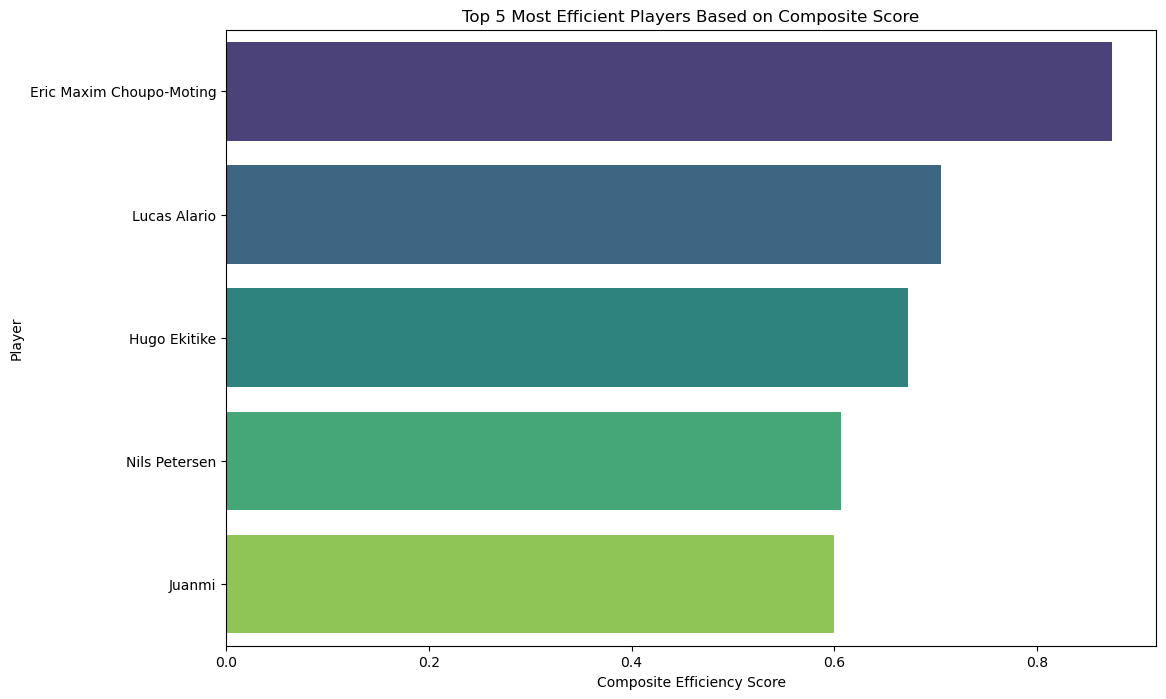

In [37]:
# Initialize the matplotlib figure
plt.figure(figsize=(12, 8))

# Creating a bar plot for the top 10 most efficient players based on the composite score
sns.barplot(x='Composite Score', y='Player', data=top_efficient_players, palette='viridis')

# Adding labels and title
plt.xlabel('Composite Efficiency Score')
plt.ylabel('Player')
plt.title('Top 5 Most Efficient Players Based on Composite Score')

# Show the plot
plt.show()

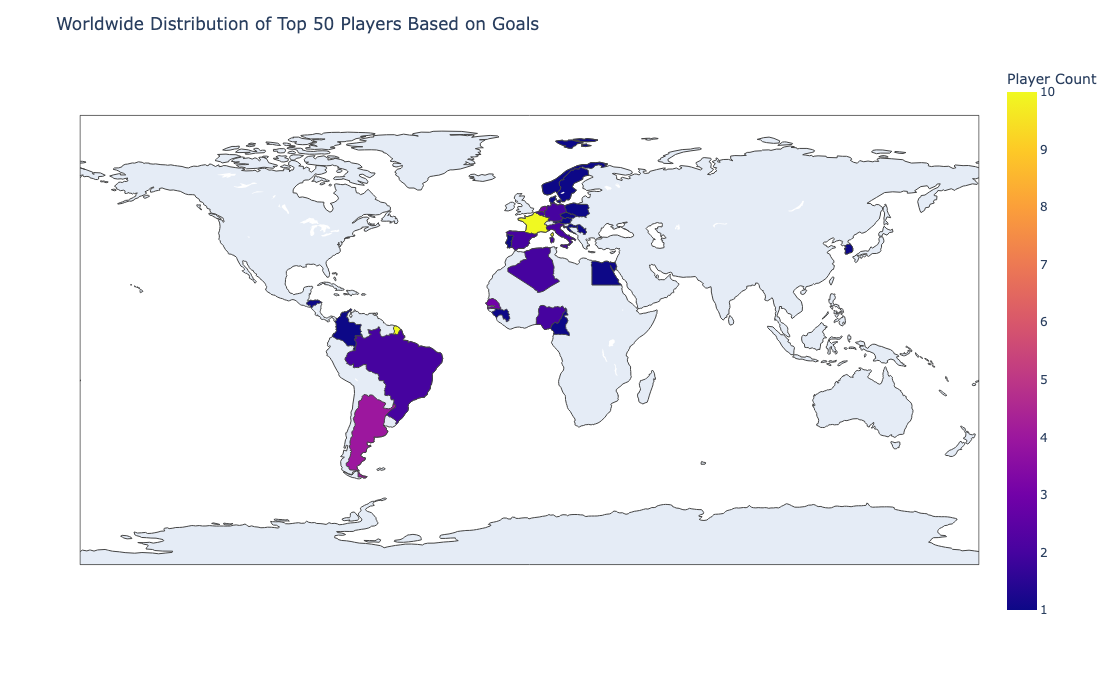

In [48]:
# Create the choropleth map
fig = px.choropleth(player_counts,
                    locations="Country",
                    locationmode='country names',
                    color="Player Count",
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.Plasma)

# Update layout to make the map bigger
fig.update_layout(
    title='Worldwide Distribution of Top 50 Players Based on Goals',
    width=1000,  # Width of the map in pixels
    height=700  # Height of the map in pixels
)

fig.show()